In [1]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing dataset
dataset = pd.read_csv('D:\ML project\wine\Data.csv')
X = dataset.iloc[:,0:11].values
Y = dataset.iloc[:, 11].values

In [5]:
# spliting data into train and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, train_size = 0.6, random_state = 7)

C:\Users\Kaustubh Khandelwal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


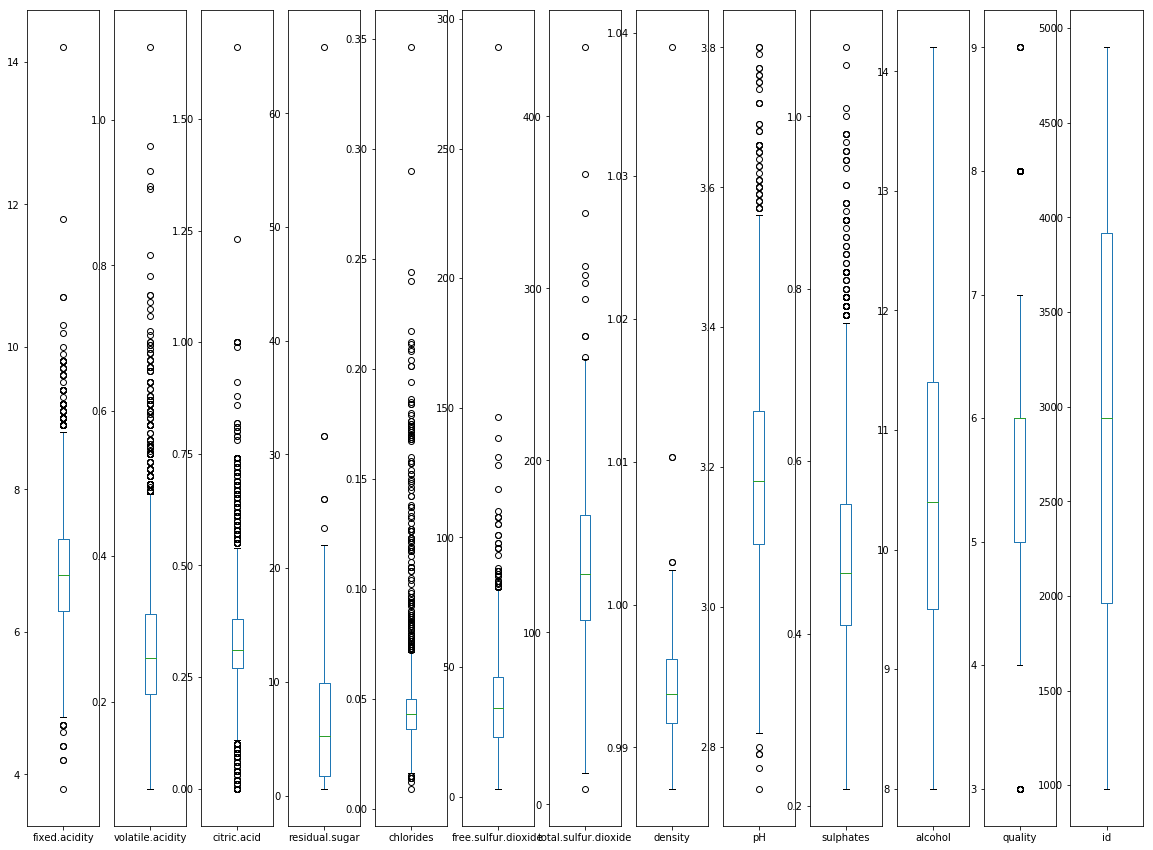

In [6]:
#plots
plt.rcParams['figure.figsize'] = (20,15)
dataset.plot(kind='box', subplots=True,  sharex=False, sharey=False)
plt.show()

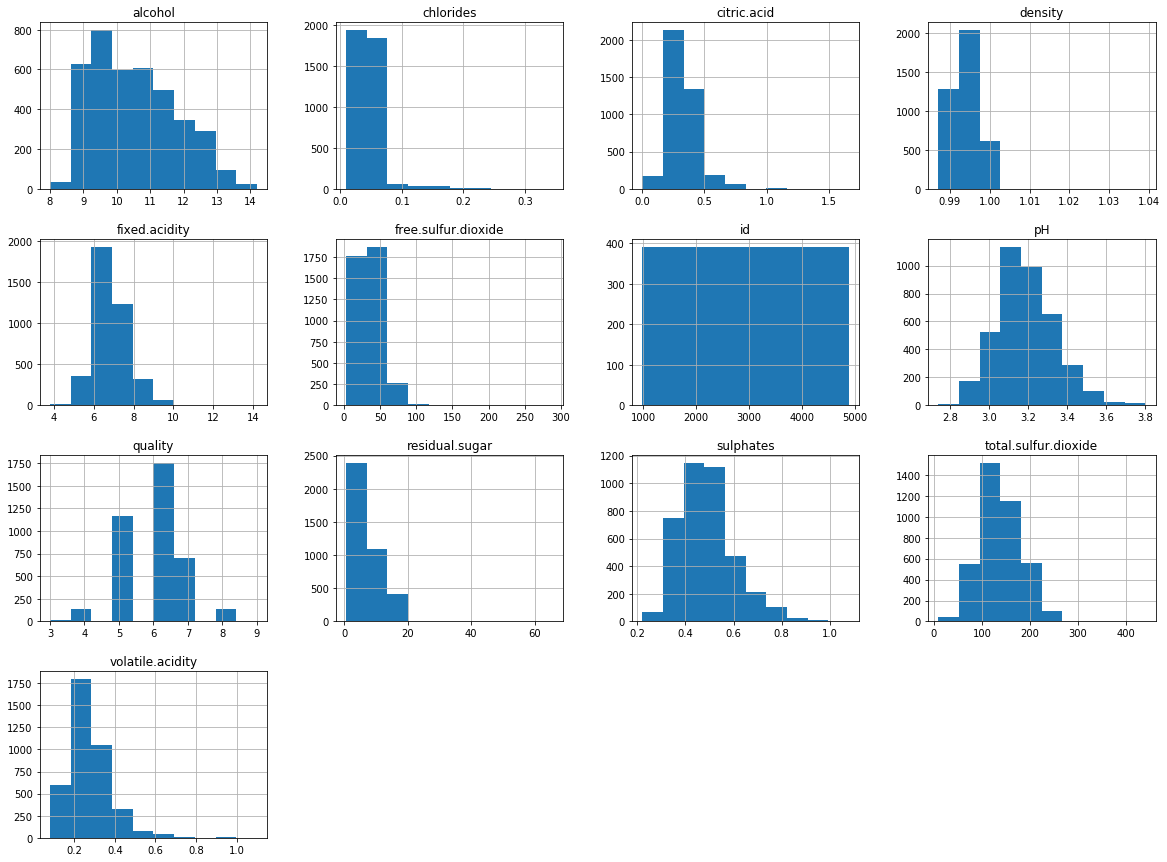

In [7]:
# histograms
dataset.hist()
plt.show()

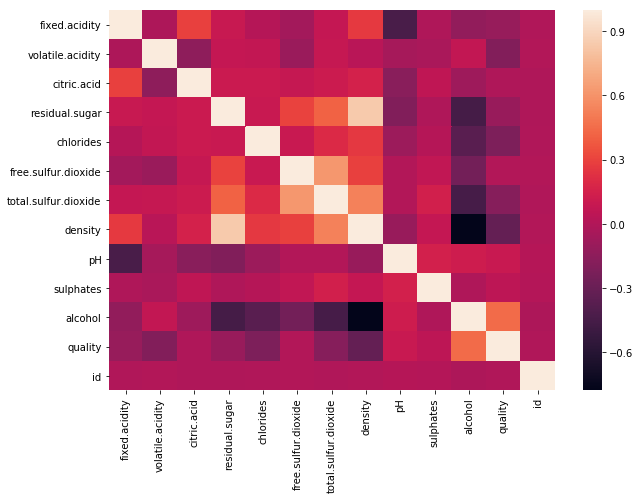

In [8]:
# correlation heatmap
plt.figure(figsize = (10,7))
sns.heatmap(dataset.corr())

In [9]:

# Spot Check Algorithms
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(('LR', LinearRegression()))
models.append(('LGR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFR', RandomForestRegressor()))
models.append(('SVR',SVR()))
models.append(('KNN',KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=7)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold,)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
	print(msg)

LR: 28.262906 (3.984931)
LGR: 52.653648 (1.795941)
LDA: 52.551934 (1.577409)
KNN: 47.498565 (2.034811)
CART: 59.494298 (1.637767)
DTR: 8.807922 (10.555735)
NB: 44.207748 (2.504500)
SVM: 56.202503 (1.931674)
RF: 63.909520 (1.844015)
RFR: 45.224471 (3.425903)
SVR: 29.058633 (4.068713)
KNN: 47.498565 (2.034811)


In [10]:
# So we can see that Random forest classifier has maximum accuracy....

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
#Prediction 
Y_pred = classifier.predict(X_test)

In [12]:
Y_pred

array([7, 5, 5, ..., 5, 6, 6], dtype=int64)

In [13]:
# Classification Report
from sklearn.metrics import classification_report
classification_report(Y_test, Y_pred)

C:\Users\Kaustubh Khandelwal\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n          3       0.00      0.00      0.00         6\n          4       0.35      0.15      0.21        52\n          5       0.63      0.67      0.65       467\n          6       0.61      0.69      0.65       697\n          7       0.60      0.49      0.54       294\n          8       0.81      0.27      0.40        49\n          9       0.00      0.00      0.00         3\n\navg / total       0.61      0.61      0.60      1568\n'

In [14]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [15]:
cm

array([[  0,   0,   2,   3,   1,   0,   0],
       [  0,   8,  23,  19,   2,   0,   0],
       [  0,  10, 313, 133,  11,   0,   0],
       [  0,   3, 140, 484,  70,   0,   0],
       [  0,   0,  15, 132, 144,   3,   0],
       [  0,   2,   4,  21,   9,  13,   0],
       [  0,   0,   1,   0,   2,   0,   0]], dtype=int64)

In [16]:
# Accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

0.6135204081632653
